Import Packages

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Q 4. Using the pandas read_csv() method, read the GDP dataset into your notebook as a DataFrame called gdp_df. Take a look at the first few and last few rows to familiarize yourself with what is contained in this dataset.

In [47]:
gdp_df=pd.read_csv('../data/gdp_percapita.csv') #getting data frame from folder

In [49]:
gdp_df.head()

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2021,1517.016266,NaN
1,Afghanistan,2020,1968.341002,NaN
2,Afghanistan,2019,2079.921861,NaN
3,Afghanistan,2018,2060.698973,NaN
4,Afghanistan,2017,2096.093111,NaN


### Q.5.How many rows and columns are in gdp_df? What are the data types of each column?

In [51]:
gdp_df.info() #getting the information of dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7662 entries, 0 to 7661
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  7662 non-null   object 
 1   Year             7662 non-null   int64  
 2   Value            7662 non-null   float64
 3   Value Footnotes  0 non-null      float64
dtypes: float64(2), int64(1), object(1)
memory usage: 239.6+ KB


### Q.6.Drop the Value Footnotes column and rename the remaining three to 'Country', 'Year', and 'GDP_Per_Capita'.

In [125]:
gdp_df=gdp_df.drop(columns='Value Footnotes',axis=3)
gdp_df=gdp_df.rename(columns={"Country or Area":"Country","Year":"Year","Value":"GDP_Per_Capita"})
print(gdp_df)

          Country  Year  GDP_Per_Capita
0     Afghanistan  2021     1517.016266
1     Afghanistan  2020     1968.341002
2     Afghanistan  2019     2079.921861
3     Afghanistan  2018     2060.698973
4     Afghanistan  2017     2096.093111
...           ...   ...             ...
7657     Zimbabwe  1994     2670.106615
7658     Zimbabwe  1993     2458.783255
7659     Zimbabwe  1992     2468.278257
7660     Zimbabwe  1991     2781.787843
7661     Zimbabwe  1990     2704.757299

[7662 rows x 3 columns]


### Q.7.How many countries have data for all years? Which countries are missing many years of data? Look at the number of observations per year. What do you notice?

In [127]:
#how many years do we have in data
gdp_df['Year'].nunique()

33

In [129]:
gdp_df['Year'].sort_values().unique().tolist()

[1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 2020,
 2021,
 2022]

In [131]:
gdp_df['Country'].value_counts()

Country
Least developed countries: UN classification    33
Middle East & North Africa                      33
Middle East & North Africa (IDA & IBRD)         33
Middle income                                   33
Mongolia                                        33
                                                ..
Kosovo                                          15
Sint Maarten (Dutch part)                       14
Turks and Caicos Islands                        12
Somalia                                         10
Djibouti                                        10
Name: count, Length: 242, dtype: int64

In [133]:
count_df=gdp_df['Country'].value_counts().reset_index()

In [135]:
count_df

,Country,count
0,Least developed countries: UN classification,33
1,Middle East & North Africa,33
2,Middle East & North Africa (IDA & IBRD),33
3,Middle income,33
4,Mongolia,33
...,...,...
237,Kosovo,15
238,Sint Maarten (Dutch part),14
239,Turks and Caicos Islands,12
240,Somalia,10


In [137]:
gdp_df


,Country,Year,GDP_Per_Capita
0,Afghanistan,2021,1517.016266
1,Afghanistan,2020,1968.341002
2,Afghanistan,2019,2079.921861
3,Afghanistan,2018,2060.698973
4,Afghanistan,2017,2096.093111
...,...,...,...
7657,Zimbabwe,1994,2670.106615
7658,Zimbabwe,1993,2458.783255
7659,Zimbabwe,1992,2468.278257
7660,Zimbabwe,1991,2781.787843


In [139]:
count_df.shape

(242, 2)

In [141]:
count_df[count_df['count']==33]['count'].count()


202

In [143]:
count_df[count_df['count']<33]['count'].count()

40

In [145]:
gdp_countries = gdp_df.groupby("Year")
gdp_observations = gdp_countries["Country"].count()
print(gdp_observations.to_string()) # Number of countries per year

Year
1990    207
1991    208
1992    210
1993    211
1994    213
1995    223
1996    223
1997    226
1998    226
1999    227
2000    233
2001    234
2002    235
2003    235
2004    236
2005    236
2006    237
2007    237
2008    238
2009    239
2010    239
2011    240
2012    240
2013    242
2014    242
2015    242
2016    242
2017    242
2018    242
2019    242
2020    242
2021    241
2022    232


In [147]:
missing_countries = gdp_df.groupby('Country')['Year'].count().sort_values().reset_index()
missing_countries = missing_countries.rename(columns={'Year':'count_of_year'})
missing_countries[missing_countries['count_of_year']<33]['Country'].count()

40

In [149]:
#Ryan's lines of code
# Questions to answer: What is the range of years in the dataset? List countries by count of unique years. List years by count of unique countries.
gdp_years = gdp_df.groupby("Country")
gdp_last = gdp_years.last()
gdp_min = gdp_last.sort_values(by="Year",ascending=False)
# All countries' first appearance in the dataset
gdp_min[gdp_min["Year"]>1990]
# All countries' whose first appearance was after 1990

,Year,GDP_Per_Capita
Country,,
Somalia,2013,889.166677
Djibouti,2013,3664.268036
Turks and Caicos Islands,2011,25731.283253
Sint Maarten (Dutch part),2009,41969.404381
Kosovo,2008,7032.452297
Cayman Islands,2006,84778.384261
Nauru,2004,5342.330551
Afghanistan,2002,1280.463171
SÃ£o TomÃ© and Principe,2001,2558.983512


### Q.8.In this question, you're going to create some plots to show the distribution of GDP per capita for the year 2020. Go to the Python Graph Gallery (https://www.python-graph-gallery.com/) and look at the different types of plots under the Distribution section. Create a histogram, a density plot, a boxplot, and a violin plot. What do you notice when you look at these plots? How do the plots compare and what information can you get out of one type that you can't necessarily get out of the others?

## Representations using Seaborn 

Text(0.5, 1.0, 'Histogram for GDP per Capita')

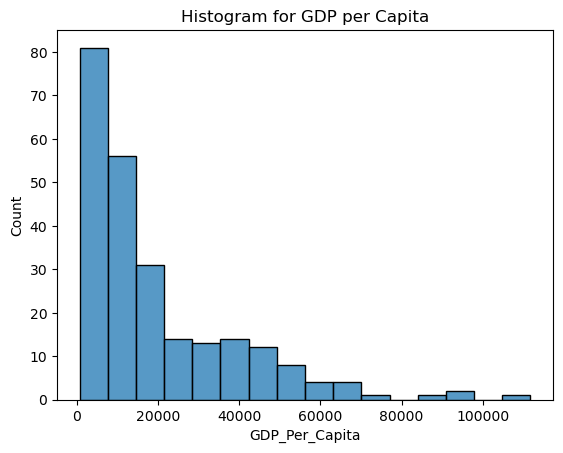

In [152]:
#histogram
year_2020=gdp_df[gdp_df['Year']==2020]
sns.histplot( data=year_2020["GDP_Per_Capita"])#, kde=True )
plt.title("Histogram for GDP per Capita")

<Axes: xlabel='GDP_Per_Capita', ylabel='Density'>

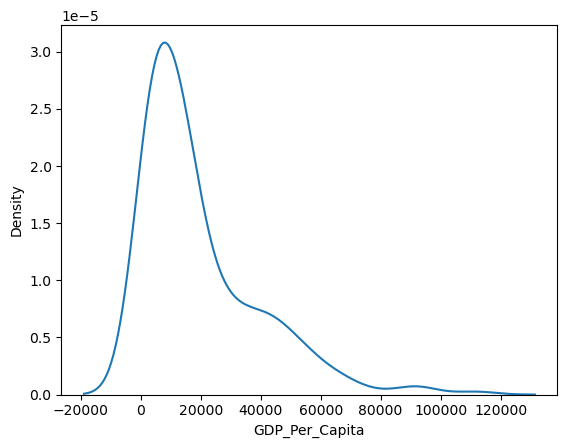

In [154]:
#Density
year_2020=gdp_df[gdp_df['Year']==2020]
sns.kdeplot(year_2020['GDP_Per_Capita'])

<Axes: ylabel='GDP_Per_Capita'>

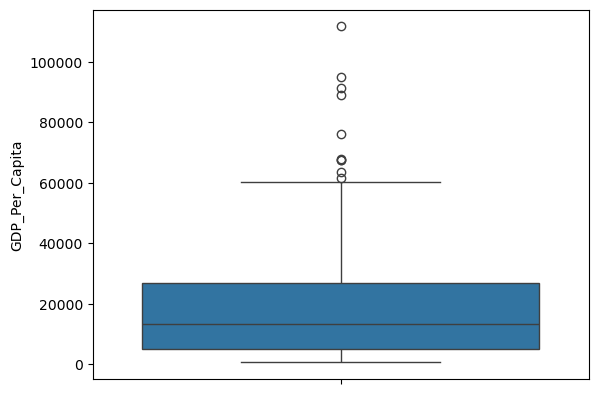

In [156]:
#boxplot
year_2020=gdp_df[gdp_df['Year']==2020]
sns.boxplot( y=year_2020["GDP_Per_Capita"] )

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

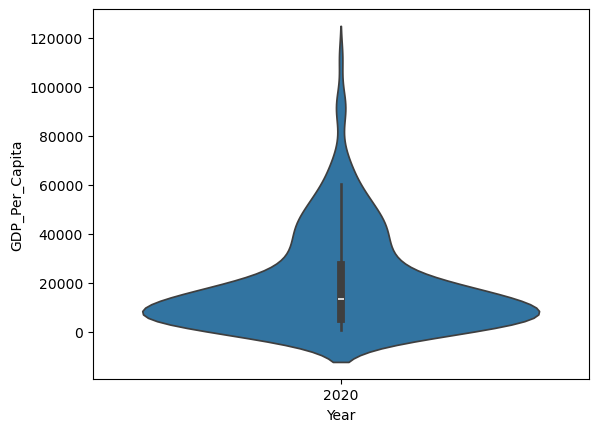

In [158]:
#violin plot of GDP per Capita for the year 2020
year_2020=gdp_df[gdp_df['Year']==2020]
sns.violinplot(x=year_2020["Year"], y=year_2020["GDP_Per_Capita"])

### Q.9.What was the median GDP per capita value in 2020?

In [160]:
year_2020=gdp_df[gdp_df['Year']==2020]
median_2020 = year_2020['GDP_Per_Capita'].median()
print(f"The median for 2020 is: {median_2020}")

The median for 2020 is: 13357.997573370474


### Q.10 For this question, you're going to create some visualizations to compare GDP per capita values for the years 1990, 2000, 2010, and 2020. Start by subsetting your data to just these 4 years into a new DataFrame named gdp_decades. Using this, create the following 4 plots:

A boxplot
A barplot (check out the Barplot with Seaborn section: https://www.python-graph-gallery.com/barplot/#Seaborn)
A scatterplot
A scatterplot with a trend line overlaid (see this regplot example: https://www.python-graph-gallery.com/42-custom-linear-regression-fit-seaborn)
Comment on what you observe has happened to GDP values over time and the relative strengths and weaknesses of each type of plot.

In [339]:
# gdp_df['decades']=(gdp_df['year']//10)*10  #creating new column in data frame
# gdp_decades = gdp_df.groupby('decades')['GDP_Per_Capita'].sum().reset_index()
# sns.barplot(x="decades", y="GDP_Per_Capita", data=gdp_decades)
# plt.show()


In [164]:
#gdp_df=gdp_df.drop(columns='decades',axis=3)

In [166]:
gdp_df


,Country,Year,GDP_Per_Capita
0,Afghanistan,2021,1517.016266
1,Afghanistan,2020,1968.341002
2,Afghanistan,2019,2079.921861
3,Afghanistan,2018,2060.698973
4,Afghanistan,2017,2096.093111
...,...,...,...
7657,Zimbabwe,1994,2670.106615
7658,Zimbabwe,1993,2458.783255
7659,Zimbabwe,1992,2468.278257
7660,Zimbabwe,1991,2781.787843


In [341]:
# sns.scatterplot(x=gdp_decades["decades"], y=gdp_decades["GDP_Per_Capita"],  data=gdp_decades)
# plt.title("GDP Per Capita by Decade")

### Q.10

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

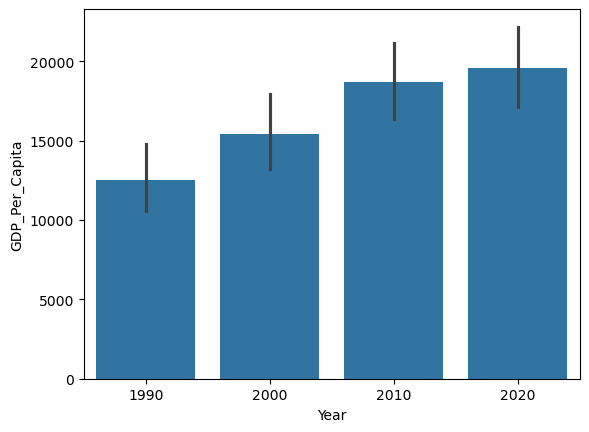

In [285]:
decades = (1990,2000,2010,2020)
gdp_decades2 = gdp_df[gdp_df['Year'].isin(decades)]
sns.barplot(x="Year", y="GDP_Per_Capita", data=gdp_decades2)

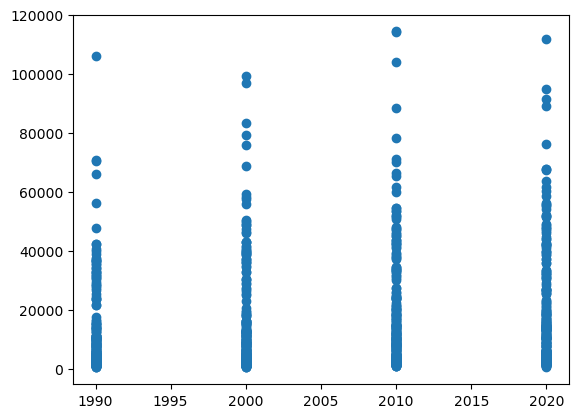

In [289]:
decades = (1990,2000,2010,2020)
gdp_decades2 = gdp_df[gdp_df['Year'].isin(decades)]
plt.scatter(gdp_decades2['Year'],gdp_decades2['GDP_Per_Capita'])

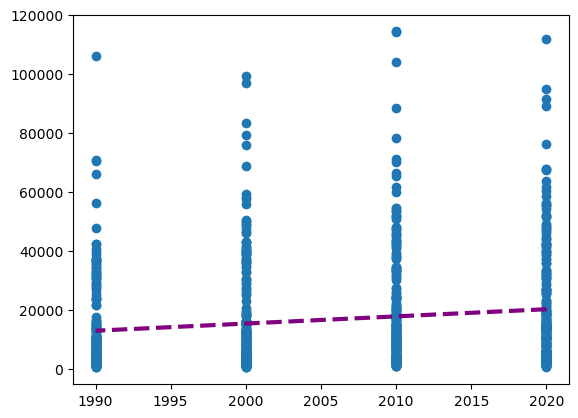

In [301]:
#sns.regplot(x='year', y='GDP_Per_Capita', data=gdp_df, scatter_kws={'s': 100}, line_kws={'color': 'red'})
plt.scatter(gdp_decades2['Year'],gdp_decades2['GDP_Per_Capita'])
z=np.polyfit(gdp_decades2['Year'],gdp_decades2['GDP_Per_Capita'],1)
p = np.poly1d(z)
#add trendline to plot
plt.plot(gdp_decades2['Year'], p(gdp_decades2['Year']),color="purple", linewidth=3, linestyle="--")

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

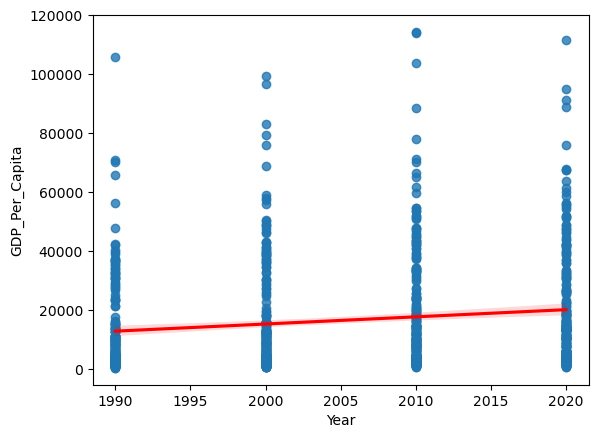

In [299]:
sns.regplot(x='Year', y='GDP_Per_Capita', data=gdp_decades2,  line_kws={'color': 'red'})


### Q.11.Which country was the first to have a GDP per capita greater than $100,000?

In [183]:
gdp_df[gdp_df['GDP_Per_Capita']>100000].sort_values('Year')

,Country,Year,GDP_Per_Capita
7302,United Arab Emirates,1990,105893.626059
7301,United Arab Emirates,1991,101048.696239
7295,United Arab Emirates,1997,100956.706467
4167,Luxembourg,2001,101143.147977
4166,Luxembourg,2002,103317.331098
4165,Luxembourg,2003,104743.000088
4164,Luxembourg,2004,107634.837198
4163,Luxembourg,2005,108632.360016
4162,Luxembourg,2006,113346.035782
4161,Luxembourg,2007,120647.822959


### Q.12.Which country had the highest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset.

In [185]:
gdp_df[gdp_df['Year']==2020].nlargest(1,'GDP_Per_Capita')['Country']

4148    Luxembourg
Name: Country, dtype: object

In [187]:
top_country=gdp_df[gdp_df['Country']=='Luxembourg']

In [189]:
top_country

,Country,Year,GDP_Per_Capita
4146,Luxembourg,2022,115541.774828
4147,Luxembourg,2021,115683.493708
4148,Luxembourg,2020,111751.314751
4149,Luxembourg,2019,114542.496934
4150,Luxembourg,2018,114164.468558
4151,Luxembourg,2017,114985.842236
4152,Luxembourg,2016,116283.699681
4153,Luxembourg,2015,113182.728563
4154,Luxembourg,2014,113313.578898
4155,Luxembourg,2013,113050.663254


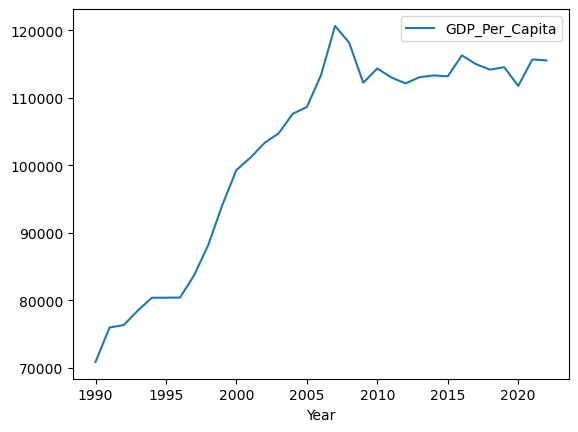

In [191]:
top_country.plot(x='Year',y='GDP_Per_Capita',kind='line');

### Q.13.Which country had the lowest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset. Bonus question: Is it true in general that coutries had a higher GDP per capita in 2020 than in 1990? Which countries had lower GDP per capita in 2020 than in 1990?

In [193]:
gdp_df[gdp_df['Year']==2020].nsmallest(1,'GDP_Per_Capita')['Country']

973    Burundi
Name: Country, dtype: object

In [195]:
lowest_country=gdp_df[gdp_df['Country']=='Burundi']

In [197]:
lowest_country

,Country,Year,GDP_Per_Capita
971,Burundi,2022,708.178317
972,Burundi,2021,714.066712
973,Burundi,2020,711.355263
974,Burundi,2019,729.658463
975,Burundi,2018,740.448223
976,Burundi,2017,750.787616
977,Burundi,2016,764.336602
978,Burundi,2015,781.579287
979,Burundi,2014,831.294839
980,Burundi,2013,824.610523


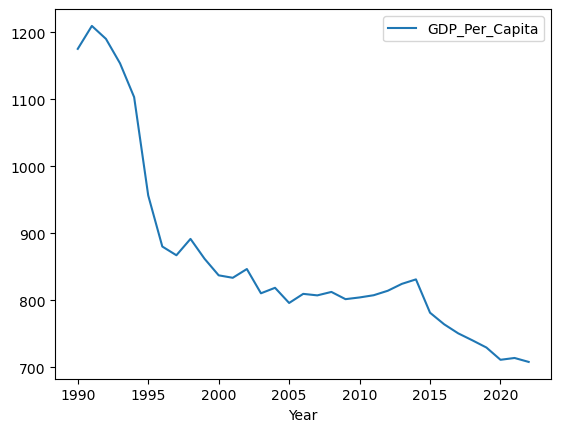

In [199]:
lowest_country.plot(x='Year',y='GDP_Per_Capita',kind='line');

### Q.14.Read in the internet use dataset into a DataFrame named internet_df. You will likely get errors when doing this. Check the arguments for the read_csv function to find ones that can help correct the errors (https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) Once you are able to read it in, take per a look at the top and bottom few rows to make sure that it has been read in correctly. Also, check the datatypes of the columns.

In [356]:
internet_df = pd.read_csv('../data/internet_use.csv',nrows=6083)
internet_df

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2019,17.600000,1
1,Afghanistan,2018,16.800000,2
2,Afghanistan,2017,13.500000,3
3,Afghanistan,2016,11.000000,4
4,Afghanistan,2015,8.260000,4
...,...,...,...,...
6078,Zimbabwe,1997,0.033080,NaN
6079,Zimbabwe,1996,0.016790,NaN
6080,Zimbabwe,1995,0.007684,NaN
6081,Zimbabwe,1994,0.001739,NaN


In [358]:
internet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6083 entries, 0 to 6082
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  6083 non-null   object 
 1   Year             6083 non-null   int64  
 2   Value            6083 non-null   float64
 3   Value Footnotes  2826 non-null   object 
dtypes: float64(1), int64(1), object(2)
memory usage: 190.2+ KB


### Q.15. Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'Internet_Users_Pct'.

In [361]:
internet_df=internet_df.drop(columns='Value Footnotes') # drop the column value footnotes
internet_df = internet_df.rename(columns={'Country or Area':'Country','Value':'Internet_Users_pct'}) #rename columns
internet_df

,Country,Year,Internet_Users_pct
0,Afghanistan,2019,17.600000
1,Afghanistan,2018,16.800000
2,Afghanistan,2017,13.500000
3,Afghanistan,2016,11.000000
4,Afghanistan,2015,8.260000
...,...,...,...
6078,Zimbabwe,1997,0.033080
6079,Zimbabwe,1996,0.016790
6080,Zimbabwe,1995,0.007684
6081,Zimbabwe,1994,0.001739


### 16. Look at the number of observations in this dataset per year. What do you notice?


In [364]:
internet_df['Country'].value_counts().head(10)

Country
Sweden                  34
Germany                 34
Denmark                 34
Portugal                33
Korea (Republic  of)    33
Spain                   33
South Africa            33
Greece                  33
Poland                  33
Brazil                  33
Name: count, dtype: int64

### Q.17. What is the first year to have a non-zero internet users percentage value?

In [367]:
internet_df_with_value = internet_df.sort_values('Internet_Users_pct') #sort values in df based on internet user pct value
internet_df_with_value[internet_df_with_value['Internet_Users_pct']>0].head(1)

,Country,Year,Internet_Users_pct
1889,Ethiopia,1995,0.000018


In [369]:
### Q.18. How does the distribution of internet users percent differ for 2000 and 2014?

In [371]:
#seperate DF for years 2000 and 2014
net_user_2000 = internet_df[(internet_df['Year']==2000)]
net_user_2014 = internet_df[(internet_df['Year']==2014)]
def iqr(column): #interquartile range 
    return column.quantile(0.75)-column.quantile(0.25)
print(net_user_2000['Internet_Users_pct'].agg([iqr]))
print(net_user_2014['Internet_Users_pct'].agg([iqr]))


iqr    10.056965
Name: Internet_Users_pct, dtype: float64
iqr    52.8592
Name: Internet_Users_pct, dtype: float64


### Q.19. For how many countries was the percentage of internet users below 5% in 2014?


In [374]:
internet_df[(internet_df['Year']==2014)&(internet_df['Internet_Users_pct']<5)].count()


Country               10
Year                  10
Internet_Users_pct    10
dtype: int64

### Q.20 Merge the two DataFrames to one. Do this in a way that keeps **all rows** from each of the two DataFrames. Call the new DataFrame `gdp_and_internet_use`. Look at the first and last 

In [377]:
gdp_and_internet_use = gdp_df.merge(internet_df,how = 'outer',on = ['Country','Year']) #merging gdf_df,internet_df data frames
gdp_and_internet_use

,Country,Year,GDP_Per_Capita,Internet_Users_pct
0,Afghanistan,1990,NaN,0.000000
1,Afghanistan,2001,NaN,0.004723
2,Afghanistan,2002,1280.463171,0.004561
3,Afghanistan,2003,1292.333437,0.087891
4,Afghanistan,2004,1260.060581,0.105809
...,...,...,...,...
9107,Zimbabwe,2018,2399.621551,25.000000
9108,Zimbabwe,2019,2203.396810,26.588300
9109,Zimbabwe,2020,1990.319419,29.298600
9110,Zimbabwe,2021,2115.144555,32.461600


In [379]:
gdp_df.info()
internet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7662 entries, 0 to 7661
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         7662 non-null   object 
 1   Year            7662 non-null   int64  
 2   GDP_Per_Capita  7662 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 179.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6083 entries, 0 to 6082
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             6083 non-null   object 
 1   Year                6083 non-null   int64  
 2   Internet_Users_pct  6083 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 142.7+ KB


In [381]:
gdp_and_internet_use.head(10)

,Country,Year,GDP_Per_Capita,Internet_Users_pct
0,Afghanistan,1990,NaN,0.000000
1,Afghanistan,2001,NaN,0.004723
2,Afghanistan,2002,1280.463171,0.004561
3,Afghanistan,2003,1292.333437,0.087891
4,Afghanistan,2004,1260.060581,0.105809
5,Afghanistan,2005,1352.320627,1.224150
6,Afghanistan,2006,1366.993146,2.107120
7,Afghanistan,2007,1528.344578,1.900000
8,Afghanistan,2008,1556.844452,1.840000
9,Afghanistan,2009,1823.742614,3.550000


### Q.21. Find the three countries with the highest internet users percentage in 2014. Use a seaborn FacetGrid (https://seaborn.pydata.org/generated/seaborn.FacetGrid.html) to compare how the 

In [384]:
gdp_and_internet_use[gdp_and_internet_use['Year']==2014].sort_values(by='Internet_Users_pct',ascending = False).head(3)

,Country,Year,GDP_Per_Capita,Internet_Users_pct
3820,Iceland,2014,50450.741612,98.158
2780,Falkland (Malvinas) Islands,2014,NaN,97.600
794,Bermuda,2014,77361.104881,96.800


In [386]:
top_net_user_2014=gdp_and_internet_use[gdp_and_internet_use['Country'].isin(['Iceland','Falkland (Malvinas) Islands','Bermuda'])]
# referenced Renuka's line of code
graph= sns.FaceGrid(top_net_user_2014,col='Country')
graph.map(plt.plot,'Year','GDP_Per_Capita')

AttributeError: module 'seaborn' has no attribute 'FaceGrid'

### Q. 22.Subset `gdp_and_internet_use` to just the year 2014. Save this as a new dataframe named `gdp_and_internet_use_2014`.


In [389]:
gdp_and_internet_use_2014 = gdp_and_internet_use[gdp_and_internet_use['Year']==2014]
gdp_and_internet_use_2014

,Country,Year,GDP_Per_Capita,Internet_Users_pct
14,Afghanistan,2014,2144.449634,7.0000
46,Africa Eastern and Southern,2014,3642.875373,NaN
79,Africa Western and Central,2014,4146.994622,NaN
112,Albania,2014,11586.817446,54.3000
145,Algeria,2014,11561.259795,29.5000
...,...,...,...,...
8978,West Bank and Gaza,2014,5967.073437,NaN
9011,World,2014,15120.730322,NaN
9039,Yemen,2014,NaN,22.5500
9070,Zambia,2014,3375.941270,6.5000


### Q.23.Create a plot which compares Internet Users Percentage and GDP per Capita for the year 2014. What do you notice from this plot? If you see any unusual points, investigate them.

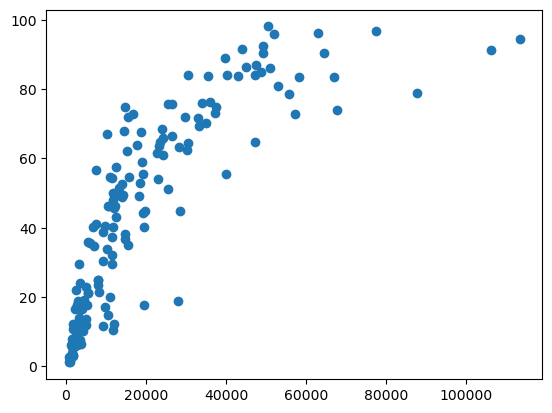

In [392]:
#plt.plot(gdp_and_internet_use_2014['GDP_Per_Capita'], gdp_and_internet_use_2014['Internet_Users_pct'])
plt.scatter(gdp_and_internet_use_2014['GDP_Per_Capita'], gdp_and_internet_use_2014['Internet_Users_pct'])
plt.show()

### Q.24.Stretch Question: Use the qcut function from pandas (https://pandas.pydata.org/docs/reference/api/pandas.qcut.html) to divide countries in gdp_per_capita_2014 into three groups based on their GDP per capita values. Label these groups as "Low", "Medium", and "High". Put these labels in a new column, named "GDP_group".

In [395]:
#pandas.qcut(x, q, labels=None, retbins=False, precision=3, duplicates='raise')
gdp_and_internet_use_2014 = gdp_and_internet_use_2014.reset_index(drop = True)

In [397]:
gdp_and_internet_use_2014['GDP_group'] = pd.qcut(gdp_and_internet_use_2014['GDP_Per_Capita'],3,labels = ['Low','Medium','High'])

In [399]:
gdp_and_internet_use_2014

,Country,Year,GDP_Per_Capita,Internet_Users_pct,GDP_group
0,Afghanistan,2014,2144.449634,7.0000,Low
1,Africa Eastern and Southern,2014,3642.875373,NaN,Low
2,Africa Western and Central,2014,4146.994622,NaN,Low
3,Albania,2014,11586.817446,54.3000,Medium
4,Algeria,2014,11561.259795,29.5000,Medium
...,...,...,...,...,...
279,West Bank and Gaza,2014,5967.073437,NaN,Low
280,World,2014,15120.730322,NaN,Medium
281,Yemen,2014,NaN,22.5500,NaN
282,Zambia,2014,3375.941270,6.5000,Low


### Q.25.Stretch Question: How does the median internet users percentage compare for the three gdp groups?

In [412]:
gdp_and_internet_use_2014.groupby(['GDP_group'],observed=True)['Internet_Users_pct'].median().reset_index()

,GDP_group,Internet_Users_pct
0,Low,11.0000
1,Medium,45.8752
2,High,75.9800
